<a href="https://colab.research.google.com/github/Mrinal19/Representation-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA**
Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique.

Covariance Matrix: 
 [[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]

 Eigenvectors: 
 [[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

 Eigenvalues: 
 [2.92442837 0.93215233 0.14946373 0.02098259]

 Eigenvalues in descending order:
2.9244283691111117
0.9321523302535063
0.14946373489813355
0.020982592764270655

 Computed Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]
 


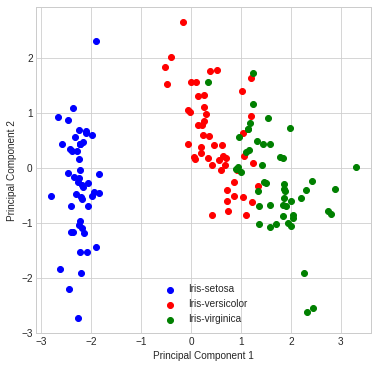

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
df.head()

#Splitting the data into data 'x' and class label 'y'
x = df.iloc[:,0:4].values
y = df.iloc[:,4].values

#Standardizing the data values
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

#Computing Covariance Matrix
mean = np.mean(x_std, axis = 0)
cov_mat = (x_std - mean).T.dot((x_std - mean))/ (x_std.shape[0]-1)
print("Covariance Matrix: \n", cov_mat)

#Calculating Eigen-values/vectors
cov_mat = np.cov(x_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_mat) #linalg calculate the multiplicative inverse of the input matrix

print("\n Eigenvectors: \n", eigen_vec)
print('\n Eigenvalues: \n', eigen_val)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('\n Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

matrix = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('\n Computed Matrix W:\n', matrix)
print(" ")

#Making Plot of PCA
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 6))
  for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                      ('blue', 'red', 'green')):
      Y = x_std.dot(matrix)
      plt.scatter(Y[y==lab, 0],
                  Y[y==lab, 1],
                  label=lab,
                  c=col)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.legend(loc='lower center')
  plt.show()

**LDA:**
Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. 

In [ ]:
import pandas as pd
import numpy as np

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end
df.tail()

url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url)

from sklearn.preprocessing import LabelEncoder
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

#Encoding Data and labels
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(x[y==cl], axis=0))
    print('Mean Vector class%s: %s\n' %(cl, mean_vectors[cl-1]))

S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('Within-class Scatter Matrix:\n', S_W)

overall_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = x[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

 # Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0]) 

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Mean Vector class1: [5.0041 3.4163 1.4653 0.2449]

Mean Vector class2: [5.936 2.77  4.26  1.326]

Mean Vector class3: [6.588 2.974 5.552 2.026]

Within-class Scatter Matrix:
 [[38.9472 13.6751 24.6201  5.6598]
 [13.6751 17.0281  8.1254  4.9169]
 [24.6201  8.1254 27.2158  6.2507]
 [ 5.6598  4.9169  6.2507  6.1736]]
between-class Scatter Matrix:
 [[ 62.6649 -19.1924 163.3935  70.6115]
 [-19.1924  10.7842 -55.0015 -22.0477]
 [163.3935 -55.0015 431.0473 184.5397]
 [ 70.6115 -22.0477 184.5397  79.6021]]

Eigenvector 1: 
[[-0.2051]
 [-0.3869]
 [ 0.5463]
 [ 0.714 ]]
Eigenvalue 1: 3.19e+01

Eigenvector 2: 
[[-0.0084]
 [-0.5891]
 [ 0.2545]
 [-0.7669]]
Eigenvalue 2: 2.77e-01

Eigenvector 3: 
[[ 0.7547]
 [-0.2247]
 [-0.1994]
 [-0.2694]]
Eigenvalue 3: -1.59e-15

Eigenvector 4: 
[[ 0.7547]
 [-0.2247]
 [-0.1994]
 [-0.2694]]
Eigenvalue 4: -1.59e-15
Eigenvalues in decreasing order:

31.874579396957305
0.27693748627003545
3.616888026901866e-15
3.616888026901866e-15
Matrix W:
 [[-0.2051 -0.0084]
 [-0.38